# GOLD PRICE PREDICTION

### Using RandomForestRegressor as it is Regression problem

In [17]:
import pandas as pd;
import numpy as np;
import seaborn as sns; ## for plots
import matplotlib.pyplot as plt; ## for graphs 
from sklearn import metrics 
from sklearn.model_selection import train_test_split ## for train test data
from sklearn.ensemble import RandomForestRegressor 

### DATA COLLLECTION AND PREPROCESSING

In [18]:
dataframe=pd.read_csv('./gld_price_data.csv')

In [19]:
dataframe.shape

(2290, 6)

In [20]:
dataframe.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
dataframe.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
dataframe.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
dataframe.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### CORRELATION
1. POSITIVE CORRELATION  -> TWO VARIBALES ARE DIRECTLY PROPORTIONAL 
2. NEGATIVE CORRELATION  -> TWO VARIBALES ARE INDIRECTLY PROPORTIONAL

In [25]:
dataframe=dataframe.drop('Date',axis=1)

In [26]:
correlation=dataframe.corr()

In [49]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Axes: >

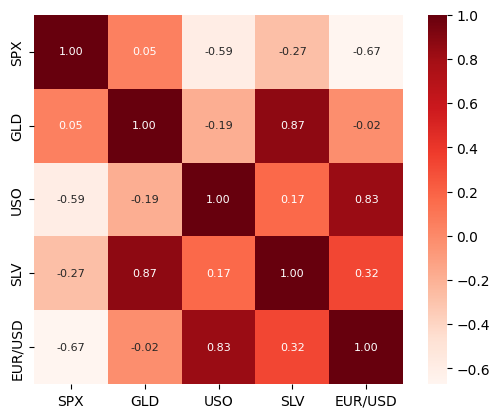

In [50]:
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt='.2f',
            annot=True,
            annot_kws={'size':8},
            cmap='Reds')  

In [51]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking the distribution of the gold price 


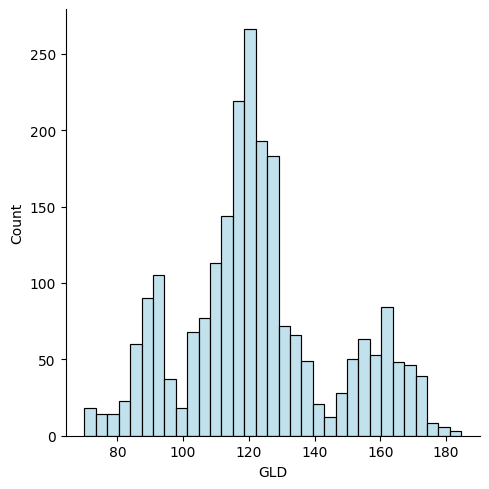

In [ ]:
sns.displot(dataframe['GLD'],color='lightblue')

### Splitting The Features and Target

In [59]:
X=dataframe.drop('GLD',axis=1)
Y=dataframe['GLD']

In [60]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [61]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

### Splitting Into Training Data And Test Data

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

print(Y.shape,Y_train.shape,Y_test.shape)

(2290, 4) (1832, 4) (458, 4)
(2290,) (1832,) (458,)


## Model Training: Random Forest Regressor

In [66]:
regressor=RandomForestRegressor(n_estimators=100)

In [67]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### MODEL EVALUATION

In [69]:
test_data_predict=regressor.predict(X_test)

In [70]:
print(test_data_predict)

[168.68739973  81.78349991 115.75830005 127.61060077 120.75450105
 154.66779785 150.17889903 125.9828004  117.50739879 125.9506006
 116.73920118 172.15300093 141.84379857 167.85219817 115.13640004
 117.66890065 140.84660295 170.21510087 159.65830346 155.53519931
 155.28890039 125.50420027 176.07609915 157.85800324 125.15340046
  93.75909948  77.0707002  120.70860004 119.0884995  167.42639923
  88.42740036 124.9292999   91.23380072 117.6802001  121.15409912
 135.99390099 115.64330117 115.10270051 149.00830017 107.24400085
 104.61570237  87.20849767 126.41570026 117.99359995 153.34129879
 119.51169984 108.29639975 108.15499848  93.32750096 127.30749736
  74.7814001  113.64159921 121.31019957 111.192999   118.74329928
 120.8793991  159.45480067 167.59400175 146.90009688  85.83759867
  94.51800032  86.80869881  90.56600065 119.06760088 126.48690066
 127.66280012 169.0316995  122.39109918 117.31639915  98.71220007
 167.74950183 143.5070989  132.09010301 121.34190238 120.88589942
 119.916800

In [73]:
error_score=metrics.r2_score(Y_test,test_data_predict)
print("R Squared Error",error_score)


R Squared Error 0.9884990172793593


### Compare The Actual Values And Predicted Values in a Plot

In [75]:
Y_test=list(Y_test)

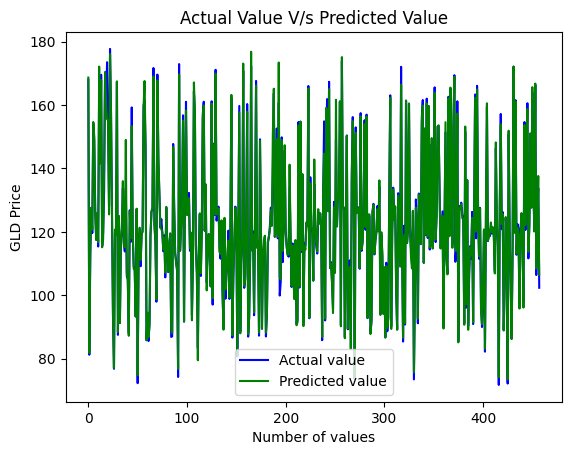

In [84]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_predict,color='green',label='Predicted value')
plt.title('Actual Value V/s Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()